## Este assignment pertence ao curso [Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/specializations/data-science-python) da especialização da Universidade de Michigan 



# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**

In [30]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Data_Value'] = df['Data_Value']/10

In [7]:
#Removendo todos os dados de 2015
df_1 = df.drop(df['Date'].str.startswith('2015'))
df['Remove'] = (df['Date'].str.startswith('2015') == True)
df_1 = df.where(df['Remove'] == False)
df_1 = df_1.dropna()
df_1 = df_1.drop('Remove',axis=1)

#Removendo os dias 29 de fevereiro dos anos bissextos
fev = df_1[df_1['Date'].str.endswith('02-29')]
fev = fev.reset_index()
df_1 = df_1.drop(fev['index'])
df_1['Data_Value'] = df_1['Data_Value']
df_1.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [9]:
# Aqui crio duas listas para iterarem no DataSet. Uma para retirar as maiores temperaturas de cada dia entre
# as vizinhanças, ex: do dia 01/01 tem 30 registros de 30 bairros diferentes, então eu pego o maior desses registros
# e coloco ele na lista de dias mais quentes, depois faço o mesmo para os dias frios
observation_dates = np.arange('2005-01-01', '2005-12-31', dtype='datetime64[D]')

ls = []
graus_max = []
graus_min = []
j=0
i = 0

for i in range(0,len(observation_dates)):
    ls.append(str(observation_dates[i])[5:10])

for j in range(0,len(ls)):
    graus_max.append((df_1['Data_Value'][df_1['Date'].str.endswith(ls[j])]).max())
    graus_min.append((df_1['Data_Value'][df_1['Date'].str.endswith(ls[j])]).min())

In [12]:
# Já aqui crio um novo DataSet com os dados de 2015 e comparo se o valor máximo entre as vizinhanças no ano de 2015
# é maior que a máxima registrada entre 2005-2014. ex: pro dia 01/01 a maior temperatura registrada entre 2005 e 2014
# foi 30 °C, então comparo se a temperatura do dia 01/01/2015 foi maior que os 30 °C e faço o mesmo para os dias frios

df_2 = df[df['Date'].str.startswith('2015')]
df_2 = df_2.sort_values('Date')

k = 0

maiores = []
menores = []

for k in range(0,len(graus_max)):
    if (df_2['Data_Value'][df_2['Date'].str.endswith(ls[k])]).max() > graus_max[k]:
        maiores.append(df_2[df_2['Date'].str.endswith(ls[k])].max())
    if (df_2['Data_Value'][df_2['Date'].str.endswith(ls[k])]).min() < graus_min[k]:
        menores.append((df_2[df_2['Date'].str.endswith(ls[k])]).min())

In [14]:
df_2.head()

,ID,Date,Element,Data_Value,Remove
44558,USC00205451,2015-01-01,TMIN,-10.6,True
51804,USC00208972,2015-01-01,TMIN,-10.6,True
43734,USC00207312,2015-01-01,TMIN,-11.1,True
43739,USC00207312,2015-01-01,TMAX,0.0,True
44224,USC00200032,2015-01-01,TMIN,-9.4,True


In [15]:
# Crio um dataframe com os dias em que a temperatura de 2015 foi maior e com a temperatura,
# faço o mesmo para as menores temperaturas

df_maiores1 = []
df_maiores2 = []
df_menores1 = []
df_menores2 = []

x=0
for x in range(1,len(menores)):
    
    df_menores1.append(menores[x][1])
    df_menores2.append(menores[x][3])
    
    df_maiores1.append(maiores[x][1])
    df_maiores2.append(maiores[x][3])
    
scatter_min = pd.DataFrame(df_menores2,df_menores1)   
scatter_max = pd.DataFrame(df_maiores2,df_maiores1)
scatter_min = scatter_min.reset_index()
scatter_max = scatter_max.reset_index()
scatter_min.iloc[:,1] = scatter_min.iloc[:,1]
scatter_max.iloc[:,1] = scatter_max.iloc[:,1]

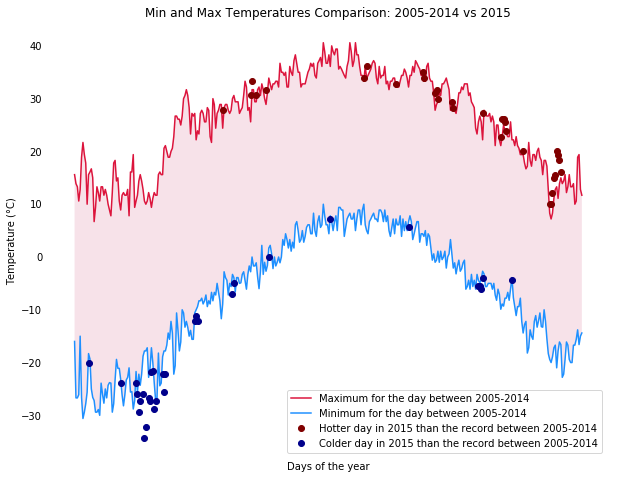

In [29]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,8))


dates = np.arange('2015-01-01', '2015-12-31', dtype='datetime64[D]')

ax.plot(dates,graus_max,color='crimson')
ax.plot(dates,graus_min,color='dodgerblue')


ax.plot_date(scatter_max.iloc[:,0], scatter_max.iloc[:,1],color = 'maroon')
ax.plot_date(scatter_min.iloc[:,0], scatter_min.iloc[:,1],color = 'darkblue')

plt.gca().fill_between(dates, 
                       graus_max, graus_min, 
                       facecolor='palevioletred', 
                       alpha=0.2)

ax.legend(['Maximum for the day between 2005-2014',
            'Minimum for the day between 2005-2014',
            'Hotter day in 2015 than the record between 2005-2014',
            'Colder day in 2015 than the record between 2005-2014'])

ax.set_xlabel('Days of the year')
ax.set_ylabel('Temperature (°C)')

ticks = ['jan','feb','mar','apr','mai','jun','jul','aug','sep','oct','nov','dec']

custom_ticks = np.linspace(1, 12,0.1,dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(['jan','feb','mar','apr','mai','jun','jul','aug','sep','oct','nov','dec'])

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')

plt.title('Min and Max Temperatures Comparison: 2005-2014 vs 2015')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.savefig('temperaturesComparison.png', format='png')    
fig.show()